In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

In [2]:
grid_Y  = 4
grid_X  = 12
epsilon = 0.1
alpha   = 0.5
gamma   = 1

# Start State, and Target State 
startState = [3, 0]
goalState  = [3, 11]

# Available Actions
actionUp    = 0
actionDown  = 1
actionLeft  = 2
actionRight = 3
actionSet   = [actionUp, actionDown, actionLeft, actionRight]

In [3]:
# Returns the reward based off the state and action taken 
def step(state, action):
    i, j = state
    if action == actionUp:
        nextState = [max(i - 1, 0), j]
    elif action == actionLeft:
        nextState = [i, max(j - 1, 0)]
    elif action == actionRight:
        nextState = [i, min(j + 1, grid_X - 1)]
    elif action == actionDown:
        nextState = [min(i + 1, grid_Y - 1), j]
    else:
        assert False

    reward = -1
    if (action == actionDown and i == 2 and 1 <= j <= 10) or (
        action == actionRight and state == startState):
        reward = -100
        nextState = startState

    return nextState, reward

# Choose an action based on the epsilon greedy algorithim
def chooseAction(state, Q_Value):
    if np.random.binomial(1, epsilon) == 1:
        return np.random.choice(actionSet)
    else:
        values_ = Q_Value[state[0], state[1], :]
        return np.random.choice([action_ for action_, value_ in enumerate(values_) if value_ == np.max(values_)])

In [4]:
# Sarsa algorithm 
def sarsa(Q_Value, stepSize = alpha):
    state   = startState
    action  = chooseAction(state, Q_Value)
    rewards = 0

    while state != goalState:
        nextState, reward = step(state, action)
        nextAction = chooseAction(nextState, Q_Value)
        rewards = rewards + reward
        
        # Expected value of new state 
        target    = 0
        Q_Prime   = Q_Value[nextState[0], nextState[1], :]
        maxAction = np.argwhere(Q_Prime == np.max(Q_Prime))
        
        for action_ in actionSet:
            if action_ in maxAction:
                target += ((1.0 - epsilon) / len(maxAction) + epsilon / len(actionSet)) * Q_Value[nextState[0], nextState[1], action_]
            else:
                target += epsilon / len(actionSet) * Q_Value[nextState[0], nextState[1], action_]

        Q_Value[state[0], state[1], action] += stepSize * (reward + target - Q_Value[state[0], state[1], action])
        state = nextState
        action = nextAction
    return rewards


In [5]:
# Q-Learning algorithm 
def q_learning(Q_Value, stepSize = alpha):
    state   = startState
    rewards = 0
    while state != goalState: 
        action   = chooseAction(state, Q_Value)
        nextState, reward = step(state, action)
        rewards = rewards + reward
        
        # Q-Learning update
        Q_Value[state[0], state[1], action] += stepSize   * (reward + gamma * np.max(Q_Value[nextState[0], nextState[1], :]) - Q_Value[state[0], state[1], action])
        state = nextState
    return rewards

In [6]:
def figure_6_4():
    # Episodes for the run
    eps  = 500

    # Perform x many runs 
    runs = 20
    
    # Initialises empty arrays for the rewards 
    q_learning_rewards = np.zeros(eps)
    sarsa_rewards      = np.zeros(eps)        
    
    # Simultaneously runs the Sarsa and Q-Learning algorithim on the same gridworld 
    
    for r in tqdm(range(runs)):
        sarsa_q      = np.zeros((grid_Y, grid_X, 4))
        q_learning_q = np.zeros((grid_Y, grid_X, 4))
        
        for i in range(0, eps):
            sarsa_rewards[i]      = sarsa_rewards[i] + max(sarsa(sarsa_q), -100)
            q_learning_rewards[i] = q_learning_rewards[i] + max(q_learning(q_learning_q), -100)
            
    # Takes a 10 point moving average 
    sarsa_rewards      = np.convolve(sarsa_rewards, np.ones((10,)) / 10, mode='valid') 
    q_learning_rewards = np.convolve(q_learning_rewards, np.ones((10,)) / 10, mode='valid') 
    
    # Average
    sarsa_rewards      = sarsa_rewards / runs
    q_learning_rewards = q_learning_rewards / runs
    
    # Draw reward lines
    plt.figure(figsize = (10,5)) 
    plt.plot(sarsa_rewards, label = 'Sarsa', color = '#FFC107')
    plt.plot(q_learning_rewards, label = 'Q-Learning', color = '#1E88E5')
    plt.yticks(np.arange(-100, 0, step = 25))
    plt.xlabel('Episodes')
    plt.ylabel('Sum of rewards during episode')
    plt.legend()

    

100%|██████████| 20/20 [00:20<00:00,  1.02s/it]


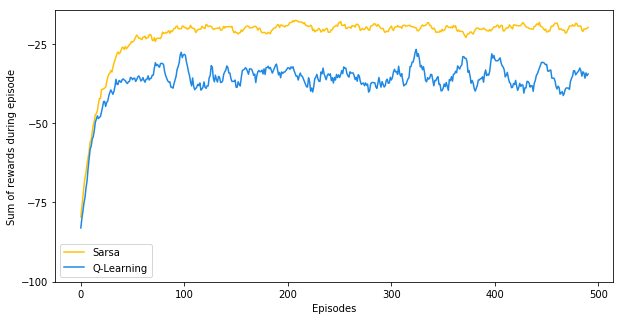

In [7]:
figure_6_4()